# UCI HAR Dataset Model Training and Testing Accuracy

**Objective:**  From the readings of the accelerometer and gyroscope embedded in a smartphone (Samsung Galaxy II) placed on the waist, 3-axial linear acceleration and 3-axial angular velocity were captured. The training set was created by preprocessing this data. I’ll use this set to classify 6 activities. 

---

### **Dataset Information:**

<table>

<tbody>

<tr>

<td bgcolor="#DDEEFF"><b>Number of Observations</b></td>

<td bgcolor="#DDEEFF"><b>Number of Features</b></td>

<td bgcolor="#DDEEFF"><b>Number of Classes</b></td>

<td bgcolor="#DDEEFF"><b>Class Labels</b></td>

<td bgcolor="#DDEEFF"><b>Sensors Used</b></td>

<td bgcolor="#DDEEFF"><b>Device Used</b></td>

<td bgcolor="#DDEEFF"><b>Number of Subjects</b></td>

<td bgcolor="#DDEEFF"><b>Sampling Frequency</b></td>

</tr>

<tr bgcolor="#FFFFFF">

<td>10299</td>

<td>561</td>

<td>6</td>

<td>1. Walking,  
2. Walking upstairs,  
3. Walking downstairs,  
4. Sitting,  
5. Standing,  
6. Laying</td>

<td>&nbsp; &nbsp; &nbsp;1. Accelerometer &nbsp; &nbsp; &nbsp;     
2. Gyroscope</td>

<td>Samsung Galaxy S II</td>

<td>30</td>

<td>50 Hz</td>

</tr>

</tbody>

</table>

---
## Importing Modules

In [36]:
from os import chdir
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns; sns.set()
from sklearn.svm import SVC 
from sklearn.model_selection import GridSearchCV 
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import classification_report
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)

---
## Loading the dataset using pandas
**The features used in the dataset:**

In [37]:
chdir('E:\\Programming\\Machine Learning\\UCI HAR Dataset')
features = pd.read_table('features.txt', delim_whitespace=True, header=None)
features.columns = ['No.', 'Features']
print(features.dtypes)
print(features)
ft_list = list(features['Features'])
print(len(ft_list))

No.          int64
Features    object
dtype: object
     No.                              Features
0      1                     tBodyAcc-mean()-X
1      2                     tBodyAcc-mean()-Y
2      3                     tBodyAcc-mean()-Z
3      4                      tBodyAcc-std()-X
4      5                      tBodyAcc-std()-Y
5      6                      tBodyAcc-std()-Z
6      7                      tBodyAcc-mad()-X
7      8                      tBodyAcc-mad()-Y
8      9                      tBodyAcc-mad()-Z
9     10                      tBodyAcc-max()-X
10    11                      tBodyAcc-max()-Y
11    12                      tBodyAcc-max()-Z
12    13                      tBodyAcc-min()-X
13    14                      tBodyAcc-min()-Y
14    15                      tBodyAcc-min()-Z
15    16                        tBodyAcc-sma()
16    17                   tBodyAcc-energy()-X
17    18                   tBodyAcc-energy()-Y
18    19                   tBodyAcc-energy()-Z
19    20


**The activity labels for each class:**

In [38]:
activity = pd.read_table('activity_labels.txt', delim_whitespace=True, header=None)
print(activity)
activity_labels = np.array(activity)[:,1]
print(activity_labels)

   0                   1
0  1             WALKING
1  2    WALKING_UPSTAIRS
2  3  WALKING_DOWNSTAIRS
3  4             SITTING
4  5            STANDING
5  6              LAYING
['WALKING' 'WALKING_UPSTAIRS' 'WALKING_DOWNSTAIRS' 'SITTING' 'STANDING'
 'LAYING']


**Training and test set:**

   tBodyAcc-mean()-X  tBodyAcc-mean()-Y  tBodyAcc-mean()-Z  tBodyAcc-std()-X  \
0           0.288585          -0.020294          -0.132905         -0.995279   
1           0.278419          -0.016411          -0.123520         -0.998245   
2           0.279653          -0.019467          -0.113462         -0.995380   
3           0.279174          -0.026201          -0.123283         -0.996091   
4           0.276629          -0.016570          -0.115362         -0.998139   

   tBodyAcc-std()-Y  tBodyAcc-std()-Z  tBodyAcc-mad()-X  tBodyAcc-mad()-Y  \
0         -0.983111         -0.913526         -0.995112         -0.983185   
1         -0.975300         -0.960322         -0.998807         -0.974914   
2         -0.967187         -0.978944         -0.996520         -0.963668   
3         -0.983403         -0.990675         -0.997099         -0.982750   
4         -0.980817         -0.990482         -0.998321         -0.979672   

   tBodyAcc-mad()-Z  tBodyAcc-max()-X  tBodyAcc-max()-Y 

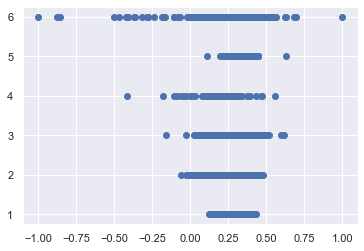

In [39]:
chdir('E:\\Programming\\Machine Learning\\UCI HAR Dataset\\train')
X_train = pd.read_table('X_train.txt', delim_whitespace=True, header=None)
X_train.columns = ft_list
print(X_train.head(5))
print(X_train.dtypes)
y_train = pd.read_table('Y_train.txt', delim_whitespace=True, header=None)
plt.scatter(X_train[ft_list[0]], y_train)
plt.show()

In [40]:
chdir('E:\\Programming\\Machine Learning\\UCI HAR Dataset\\test')
X_test = np.array(pd.read_table('X_test.txt', delim_whitespace=True, header=None))
y_test = np.array(pd.read_table('y_test.txt', delim_whitespace=True, header=None))

---
## Preparing the dataset
In order to use the dataset with `scikit-learn` it's better to convert the pandas dataframes to munpy ndarrays. I will check the shape of the ndarrays if they are suitable for SVM.

In [41]:
X_train = np.array(X_train)
y_train = np.array(y_train)
print(X_test.shape)
print(y_test.shape)
print(X_train.shape)
print(y_train.shape)

(2947, 561)
(2947, 1)
(7352, 561)
(7352, 1)


The `y_train` and `y_test` ndarrays are two dimensional. In order to use them to fit SVM model, `SVC()` needs them to be one dimensional arrays. So, I am slicing them to make them suitable.

In [42]:
y_train = y_train[:,0]
y_test = y_test[:,0]
print(y_train.shape)
print(y_test.shape)

(7352,)
(2947,)


---
## Training and fitting dataset
I will train and fit the dataset using rbf kernel with random values of the parameters `C` and `gamma`.

In [55]:
svm = SVC(C=0.1,kernel="rbf")
svm.fit(X_train,y_train)
y_pred_initial = svm.predict(X_test)

Now, checking how well the random model fits the dataset.

                    precision    recall  f1-score   support

           WALKING       0.90      0.99      0.94       496
  WALKING_UPSTAIRS       0.91      0.95      0.93       471
WALKING_DOWNSTAIRS       0.98      0.82      0.89       420
           SITTING       0.88      0.79      0.83       491
          STANDING       0.83      0.90      0.86       532
            LAYING       1.00      1.00      1.00       537

          accuracy                           0.91      2947
         macro avg       0.92      0.91      0.91      2947
      weighted avg       0.92      0.91      0.91      2947



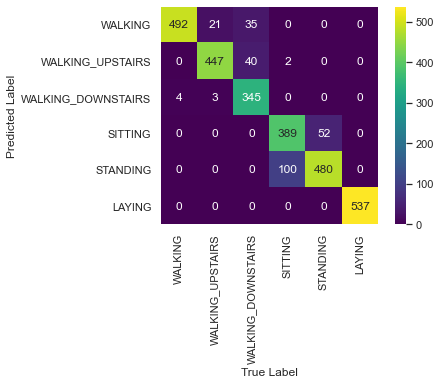

In [56]:
print(classification_report(y_test,y_pred_initial,target_names = activity_labels))
conf_initial = confusion_matrix(y_test,y_pred_initial)
sns.heatmap(conf_initial.T, square=True, annot=True, fmt="d", cbar=True,cmap="viridis", xticklabels=activity_labels,
            yticklabels=activity_labels);
plt.xlabel("True Label");
plt.ylabel("Predicted Label");

---
## Optimizing the model with different kernels
I will use four kernels: **Linear**, **Radial Basis Function (RBF)**, **Polynomial** and **Sigmoid** to evaluate which kernel works best in this dataset. I will try to catch the best parameters for each kernel using `GridSearchCV` method.

---
### Linear kernel

In [47]:
param_grid_linear = [{'C':[0.25,0.4,0.45,0.5,0.55,0.6,0.75],"kernel":["linear"]}]
grid_linear = GridSearchCV(SVC(),param_grid_linear,n_jobs=4)
%time grid_linear.fit(X_train,y_train)
grid_linear.best_params_

Wall time: 31 s


{'C': 0.5, 'kernel': 'linear'}

So, the best fit of Linear kernel occurs when C is set to 0.5. Now, this model needs to be evaluated in case of test set and training set. A heatmap of the confusion matrix is given for better visualisation.

In [48]:
model_linear = grid_linear.best_estimator_
y_pred_linear = model_linear.predict(X_test)

In [71]:
print(classification_report(y_test,y_pred_linear,target_names = activity_labels))

                    precision    recall  f1-score   support

           WALKING       0.96      0.99      0.97       496
  WALKING_UPSTAIRS       0.98      0.96      0.97       471
WALKING_DOWNSTAIRS       0.99      0.98      0.98       420
           SITTING       0.96      0.88      0.92       491
          STANDING       0.90      0.97      0.93       532
            LAYING       1.00      1.00      1.00       537

          accuracy                           0.96      2947
         macro avg       0.96      0.96      0.96      2947
      weighted avg       0.96      0.96      0.96      2947



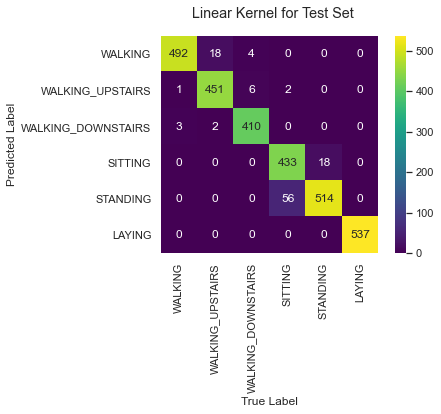

In [76]:
conf_linear_test = confusion_matrix(y_test,y_pred_linear)
sns.heatmap(conf_linear_test.T, square=True, annot=True, fmt="d", cbar=True,cmap="viridis", xticklabels=activity_labels,
            yticklabels=activity_labels);
plt.xlabel("True Label");
plt.ylabel("Predicted Label");
plt.suptitle("Linear Kernel for Test Set");

In [73]:
y_train_linear = model_linear.predict(X_train)

In [74]:
print(classification_report(y_train,y_train_linear,target_names = activity_labels))

                    precision    recall  f1-score   support

           WALKING       1.00      1.00      1.00      1226
  WALKING_UPSTAIRS       1.00      1.00      1.00      1073
WALKING_DOWNSTAIRS       1.00      1.00      1.00       986
           SITTING       0.98      0.98      0.98      1286
          STANDING       0.98      0.98      0.98      1374
            LAYING       1.00      1.00      1.00      1407

          accuracy                           0.99      7352
         macro avg       0.99      0.99      0.99      7352
      weighted avg       0.99      0.99      0.99      7352



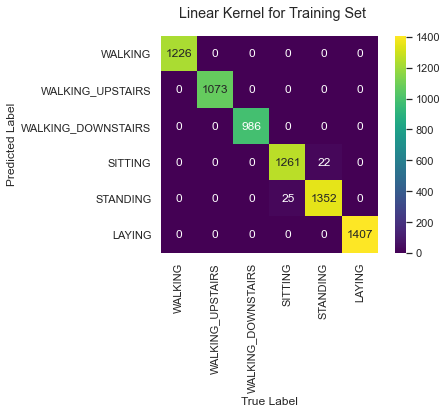

In [75]:
conf_linear_train = confusion_matrix(y_train,y_train_linear)
sns.heatmap(conf_linear_train.T, square=True, annot=True, fmt="d", cbar=True,cmap="viridis", xticklabels=activity_labels,
            yticklabels=activity_labels);
plt.xlabel("True Label");
plt.ylabel("Predicted Label");
plt.suptitle("Linear Kernel for Training Set");

## RBF kernel

In [68]:
param_grid_rbf = [{'C':[1,10,50,100],"gamma":[0.001,0.01,0.05,0.5],"kernel":["rbf"]}]
grid_rbf = GridSearchCV(SVC(),param_grid_rbf,n_jobs=4)
%time grid_rbf.fit(X_train,y_train)
grid_rbf.best_params_

Wall time: 8min 34s


{'C': 50, 'gamma': 0.01, 'kernel': 'rbf'}

So, the best fit of RBF kernel occurs when C is set to 50 and gamma is set to 0.01. Now, this model needs to be evaluated in case of test set and training set. A heatmap of the confusion matrix is given for better visualisation.

In [69]:
model_rbf = grid_rbf.best_estimator_
y_pred_rbf = model_rbf.predict(X_test)

In [70]:
print(classification_report(y_test,y_pred_rbf,target_names = activity_labels))

                    precision    recall  f1-score   support

           WALKING       0.96      0.98      0.97       496
  WALKING_UPSTAIRS       0.94      0.97      0.95       471
WALKING_DOWNSTAIRS       0.99      0.94      0.97       420
           SITTING       0.98      0.90      0.94       491
          STANDING       0.92      0.98      0.95       532
            LAYING       1.00      1.00      1.00       537

          accuracy                           0.96      2947
         macro avg       0.97      0.96      0.96      2947
      weighted avg       0.97      0.96      0.96      2947



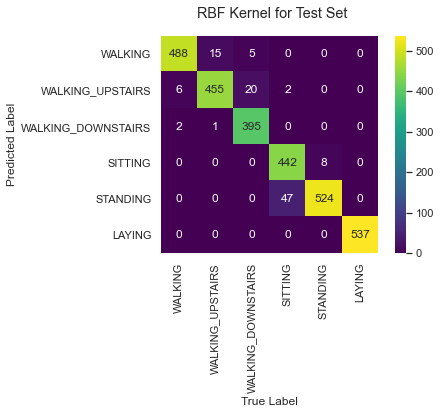

In [77]:
conf_rbf_test = confusion_matrix(y_test,y_pred_rbf)
sns.heatmap(conf_rbf_test.T, square=True, annot=True, fmt="d", cbar=True,cmap="viridis", xticklabels=activity_labels,
            yticklabels=activity_labels);
plt.xlabel("True Label");
plt.ylabel("Predicted Label");
plt.suptitle("RBF Kernel for Test Set");

In [80]:
y_train_rbf = model_rbf.predict(X_train)
print(classification_report(y_train,y_train_rbf,target_names = activity_labels))

                    precision    recall  f1-score   support

           WALKING       1.00      1.00      1.00      1226
  WALKING_UPSTAIRS       1.00      1.00      1.00      1073
WALKING_DOWNSTAIRS       1.00      1.00      1.00       986
           SITTING       1.00      1.00      1.00      1286
          STANDING       1.00      1.00      1.00      1374
            LAYING       1.00      1.00      1.00      1407

          accuracy                           1.00      7352
         macro avg       1.00      1.00      1.00      7352
      weighted avg       1.00      1.00      1.00      7352



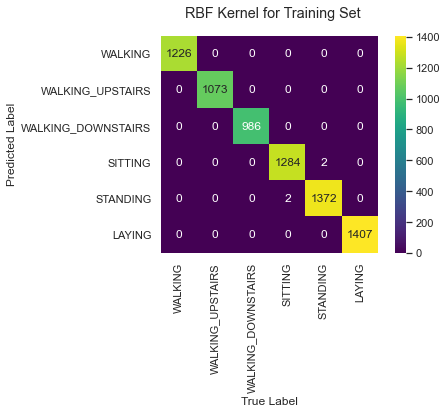

In [81]:
conf_rbf_train = confusion_matrix(y_train,y_train_rbf)
sns.heatmap(conf_rbf_train.T, square=True, annot=True, fmt="d", cbar=True,cmap="viridis", xticklabels=activity_labels,
            yticklabels=activity_labels);
plt.xlabel("True Label");
plt.ylabel("Predicted Label");
plt.suptitle("RBF Kernel for Training Set");

## Polynomial kernel

In [83]:
param_grid_poly = [{'C':[0.01,0.08,1],"gamma":[0.001, 0.01, 0.1],"kernel":["poly"],"degree":[4, 6, 8]}]
grid_poly = GridSearchCV(SVC(),param_grid_poly,n_jobs=4)
%time grid_poly.fit(X_train,y_train)
grid_poly.best_params_

Wall time: 15min 3s


{'C': 0.08, 'degree': 6, 'gamma': 0.01, 'kernel': 'poly'}

So, the best fit of Polynomial kernel occurs when degree is set to 6, C is set to 0.08 and gamma is set to 0.01. Now, this model needs to be evaluated in case of test set and training set. A heatmap of the confusion matrix is given for better visualisation.

                    precision    recall  f1-score   support

           WALKING       0.95      0.98      0.96       496
  WALKING_UPSTAIRS       0.94      0.95      0.95       471
WALKING_DOWNSTAIRS       0.98      0.95      0.96       420
           SITTING       0.98      0.91      0.95       491
          STANDING       0.93      0.98      0.96       532
            LAYING       1.00      1.00      1.00       537

          accuracy                           0.96      2947
         macro avg       0.96      0.96      0.96      2947
      weighted avg       0.96      0.96      0.96      2947



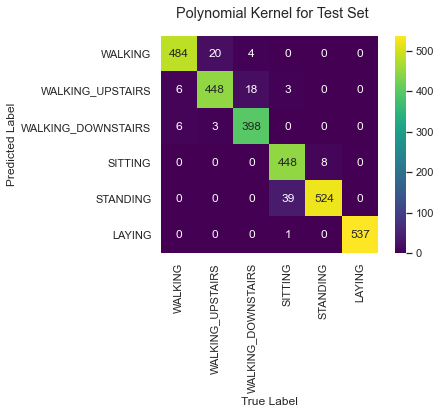

In [84]:
model_poly = grid_poly.best_estimator_
y_pred_poly = model_poly.predict(X_test)
print(classification_report(y_test,y_pred_poly,target_names = activity_labels))
conf_poly_test = confusion_matrix(y_test,y_pred_poly)
sns.heatmap(conf_poly_test.T, square=True, annot=True, fmt="d", cbar=True,cmap="viridis", xticklabels=activity_labels,
            yticklabels=activity_labels);
plt.xlabel("True Label");
plt.ylabel("Predicted Label");
plt.suptitle("Polynomial Kernel for Test Set");

                    precision    recall  f1-score   support

           WALKING       1.00      1.00      1.00      1226
  WALKING_UPSTAIRS       1.00      1.00      1.00      1073
WALKING_DOWNSTAIRS       1.00      1.00      1.00       986
           SITTING       1.00      1.00      1.00      1286
          STANDING       1.00      1.00      1.00      1374
            LAYING       1.00      1.00      1.00      1407

          accuracy                           1.00      7352
         macro avg       1.00      1.00      1.00      7352
      weighted avg       1.00      1.00      1.00      7352



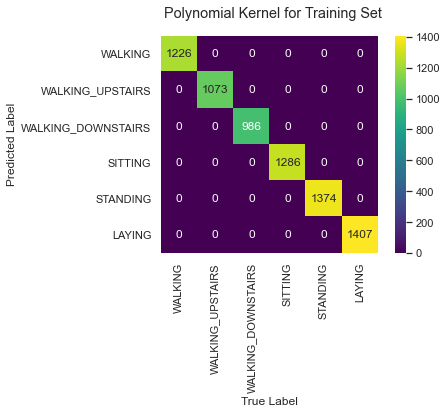

In [85]:
y_train_poly = model_poly.predict(X_train)
print(classification_report(y_train,y_train_poly,target_names = activity_labels))
conf_poly_train = confusion_matrix(y_train,y_train_poly)
sns.heatmap(conf_poly_train.T, square=True, annot=True, fmt="d", cbar=True,cmap="viridis", xticklabels=activity_labels,
            yticklabels=activity_labels);
plt.xlabel("True Label");
plt.ylabel("Predicted Label");
plt.suptitle("Polynomial Kernel for Training Set");

# Sigmoid

In [86]:
param_grid_sig = [{'C':[100,500,1980,5000],"gamma":[0.0001,0.0010,0.01],"kernel":["sigmoid"]}]
grid_sig = GridSearchCV(SVC(),param_grid_sig,n_jobs=4)
%time grid_sig.fit(X_train,y_train)
grid_sig.best_params_

Wall time: 2min 36s


{'C': 1980, 'gamma': 0.001, 'kernel': 'sigmoid'}

So, the best fit for Sigmoid kernel occurs when C is set to 1980 and gamma is set to 0.001. Now, this model needs to be evaluated in case of test set and training set. A heatmap of the confusion matrix is given for better visualisation.

                    precision    recall  f1-score   support

           WALKING       0.96      0.99      0.98       496
  WALKING_UPSTAIRS       0.98      0.96      0.97       471
WALKING_DOWNSTAIRS       0.99      0.98      0.98       420
           SITTING       0.96      0.87      0.92       491
          STANDING       0.90      0.97      0.93       532
            LAYING       1.00      1.00      1.00       537

          accuracy                           0.96      2947
         macro avg       0.96      0.96      0.96      2947
      weighted avg       0.96      0.96      0.96      2947



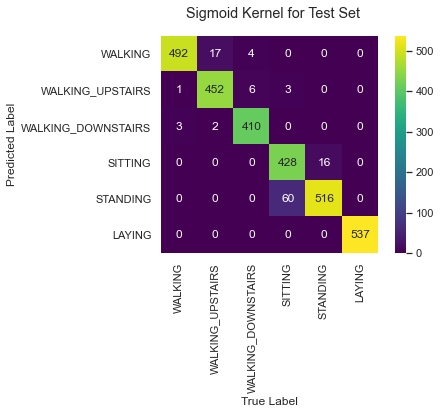

In [87]:
model_sig = grid_sig.best_estimator_
y_pred_sig = model_sig.predict(X_test)
print(classification_report(y_test,y_pred_sig,target_names = activity_labels))
conf_sig_test = confusion_matrix(y_test,y_pred_sig)
sns.heatmap(conf_sig_test.T, square=True, annot=True, fmt="d", cbar=True,cmap="viridis", xticklabels=activity_labels,
            yticklabels=activity_labels);
plt.xlabel("True Label");
plt.ylabel("Predicted Label");
plt.suptitle("Sigmoid Kernel for Test Set");

                    precision    recall  f1-score   support

           WALKING       1.00      1.00      1.00      1226
  WALKING_UPSTAIRS       1.00      1.00      1.00      1073
WALKING_DOWNSTAIRS       1.00      1.00      1.00       986
           SITTING       0.98      0.98      0.98      1286
          STANDING       0.98      0.98      0.98      1374
            LAYING       1.00      1.00      1.00      1407

          accuracy                           0.99      7352
         macro avg       0.99      0.99      0.99      7352
      weighted avg       0.99      0.99      0.99      7352



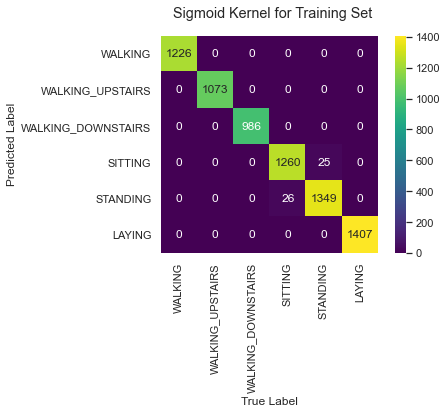

In [88]:
y_train_sig = model_sig.predict(X_train)
print(classification_report(y_train,y_train_sig,target_names = activity_labels))
conf_sig_train = confusion_matrix(y_train,y_train_sig)
sns.heatmap(conf_sig_train.T, square=True, annot=True, fmt="d", cbar=True,cmap="viridis", xticklabels=activity_labels,
            yticklabels=activity_labels);
plt.xlabel("True Label");
plt.ylabel("Predicted Label");
plt.suptitle("Sigmoid Kernel for Training Set");

---
## Conclusion
All the four kernels has very similar performance on the test set. But "RBF" kernel has a slightly better performance with averege precision: **0.97**, average recall: **0.96** and average F1-score: **0.96**.